In [1]:
import nibabel as nib
import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def muti(f1, f2):
    return f1*f2

In [3]:
def process(np_train, fname, index):
    mark_dir = os.path.join('./train/groundtruth')
    head_mark = 'mask_c'
    sub_name = fname[1:]
    mark = head_mark + sub_name
    
    file_mark = os.path.join(mark_dir, mark)
    data = nib.load(file_mark).get_fdata()
    np_data = np.rollaxis(data, 2, 0)
    
    mp_marked = muti(np_data[index], np_train)
    return mp_marked

In [4]:
def generate_data(directory, batch_size):
    i = 0
    size = 1008
    skip = False
    file_list = os.listdir(directory)
    while True:
        for b in range(batch_size):
            if i == len(file_list):
                i = 0
                random.shuffle(file_list)
            sample = file_list[i]
            i += 1
            
            file_dir = os.path.join(directory, sample)
            data  = nib.load(file_dir).get_fdata()
            np_data = np.rollaxis(data, 2, 0)
            
            if np_data.shape[1] != size:
                skip = True
                break
            else:
                skip = False
                
            train_batch = np.zeros((batch_size*12, np_data.shape[1], np_data.shape[2]), dtype=np.int)
            label_batch = np.zeros((batch_size*12, np_data.shape[1], np_data.shape[2]), dtype=np.int)

            for i in range(12):
                train_batch[i] = np_data[i]
                label_batch[i] = process(np_data[i], sample, i)
        if skip:
            continue
        yield train_batch, label_batch

In [5]:
train_generator = generate_data('./train/image', 2)

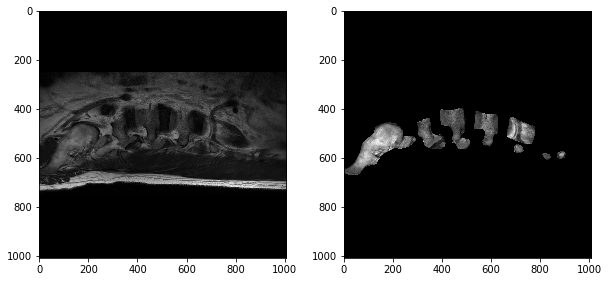

In [6]:
a, b = next(train_generator)
a1 = a[0]
b1 = b[0]
plt.figure(figsize=(10,10)) 
plt.subplot(221)
plt.imshow(a1, cmap='gray')
plt.subplot(222)
plt.imshow(b1, cmap='gray')

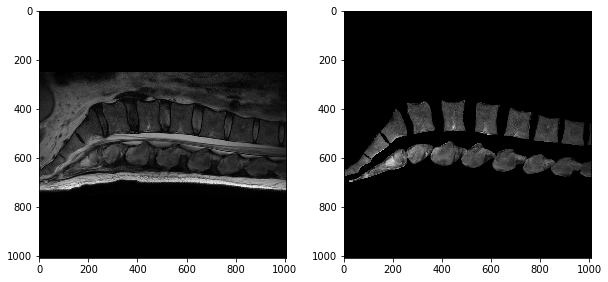

In [8]:
a1 = a[6]
b1 = b[6]
plt.figure(figsize=(10,10)) 
plt.subplot(221)
plt.imshow(a1, cmap='gray')
plt.subplot(222)
plt.imshow(b1, cmap='gray')